In [33]:
import pandas as pd

df = pd.read_csv('./data.csv')

df

,x,y
0,54,1
1,56,2
2,102,11
3,3,2
4,24,33
...,...,...
95,9,92
96,48,84
97,64,24
98,32,32


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       100 non-null    int64
 1   y       100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


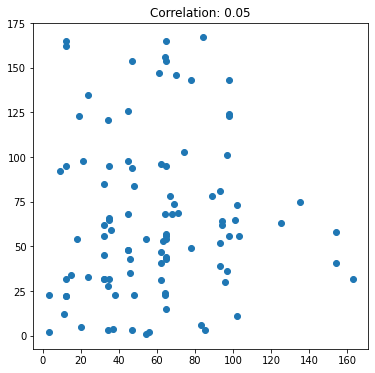

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(df['x'], df['y'])[0, 1]

# Create a scatter plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.scatter(df['x'], df['y'])

# Set the correlation coefficient as the plot title
ax.set_title(f'Correlation: {corr_coeff:.2f}')

# Display the plot
plt.show()


In [36]:
import numpy as np


def cosine_proximity_matrix(vector1,vector2):
    num_vector1 = vector1.shape[0]
    num_vector2 = vector2.shape[0]
    # print(num_vector2)
    proximity_matrix = np.zeros((num_vector1, num_vector2))

    for i in range(num_vector1):
        for j in range(num_vector2):
            # similarity = cosine_similarity(vector1.iloc[i], vector2.iloc[j])
            dot_product = np.dot(vector1.iloc[i], vector2.iloc[j])
            cosine_distance = 1 - dot_product / (np.linalg.norm(vector1.iloc[i]) * np.linalg.norm(vector2.iloc[j]))
            similarity = 1 - cosine_distance

            # print(similarity)
            proximity_matrix[i, j] = similarity
            # proximity_matrix[j, i] = similarity 

    return proximity_matrix

# cosine_proximity_matrix(df,df)

In [37]:
import numpy as np

def euclidean_proximity_matrix(vector1,vector2):
    num_vectors1 = vector1.shape[0]
    num_vectors2 = vector2.shape[0]
    proximity_matrix = np.zeros((num_vectors1, num_vectors2))

    for i in range(num_vectors1):
        for j in range(num_vectors2):
            
            diff = np.array(vector1.iloc[i]) - np.array(vector2.iloc[j])
            squared_diff = diff ** 2
            sum_squared_diff = np.sum(squared_diff)
            distance = np.sqrt(sum_squared_diff)
            
            proximity_matrix[i, j] = distance
            # proximity_matrix[j, i] = distance

    return proximity_matrix


In [38]:
def kmeans(proximity_measure,k):
    centroids = df.sample(n=k)
    
    iteration =0
    oldcenteroid=None

    while not centroids.equals(oldcenteroid):
        oldcenteroid=centroids
        iteration+=1
        
    if proximity_measure == 'cosine':
      lables = np.argmax(cosine_proximity_matrix(centroids, df), axis=0)
    elif proximity_measure == 'euclidean':
      lables = np.argmin(euclidean_proximity_matrix(centroids, df), axis=0)
      
    average = np.zeros((k, 2))
    cnt = np.zeros(k)

    for i, label in enumerate(lables):
        average[label] += df.iloc[i][["x", "y"]]
        cnt[label] += 1

    average = average / cnt[:, np.newaxis]
    centroids = pd.DataFrame(average, columns=["x", "y"])

    return centroids
        
        
  

Euclidean


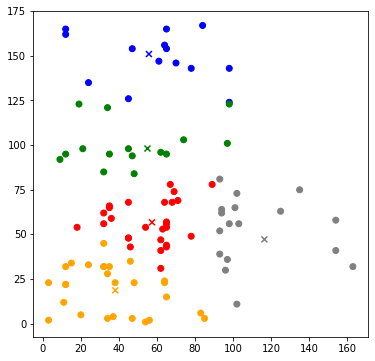

In [39]:
import matplotlib.pyplot as plt

print("Euclidean")
centroids = kmeans('euclidean',5)
colorslist = ['orange', 'green', 'blue','red','gray']

labels = np.argmin(euclidean_proximity_matrix(centroids, df), axis=0)
    
colors = [colorslist[l] for l in labels]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.scatter(df['x'], df['y'], color=colors)
ax.scatter(centroids['x'], centroids['y'], color=colorslist, marker='x')

plt.show()

Cosine


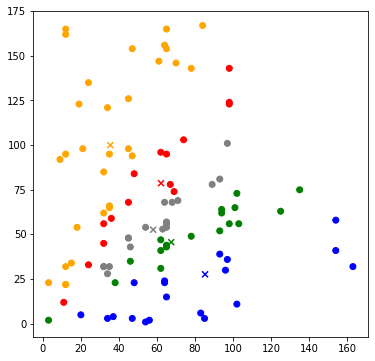

In [40]:
print("Cosine")

centroids = kmeans('cosine',5)
colorslist = ['orange', 'green', 'gray','blue','red']

labels = np.argmax(cosine_proximity_matrix(centroids, df), axis=0)
    
colors = [colorslist[l] for l in labels]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.scatter(df['x'], df['y'], color=colors)
ax.scatter(centroids['x'], centroids['y'], color=colorslist, marker='x')

plt.show()